In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("c:\data\e-commerce\ecommerce_customer_data_large.csv")

In [2]:
df.columns = ['customer_id', 'purchase_date', 'product_category', 'product_price', 'quantity', 'total_purchase_amount', 'payment_method', 'customer_age', 'returns', 'customer_name', 'age', 'gender', 'churn']
df.drop(['customer_name'], axis=1, inplace=True)
df.columns

Index(['customer_id', 'purchase_date', 'product_category', 'product_price',
       'quantity', 'total_purchase_amount', 'payment_method', 'customer_age',
       'returns', 'age', 'gender', 'churn'],
      dtype='object')

In [3]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df = df.sort_values(by='purchase_date', ascending=True)

print(df['purchase_date'].dtypes)

datetime64[ns]


In [4]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['purchase_month'] = df['purchase_date'].apply(get_month)
df.head(2)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month
231894,11789,2020-01-01 00:07:26,Clothing,426,4,2046,Cash,45,1.0,45,Male,0,2020-01-01
159409,48592,2020-01-01 00:11:40,Clothing,160,4,2514,Cash,49,0.0,49,Male,0,2020-01-01


In [5]:
df['purchase_month'] = df.groupby('customer_id')['purchase_month'].transform('min')

# 최소한 1년은 구매하지 않은 고객을 선정함
customer2022 = df[df['purchase_month'].dt.year >= 2022]

print(customer2022.shape)
customer2022.head()

(7640, 13)


,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month
227286,4248,2022-01-01 01:31:58,Clothing,320,2,4385,PayPal,40,1.0,40,Female,0,2022-01-01
125613,11491,2022-01-01 01:40:59,Electronics,21,1,727,PayPal,44,0.0,44,Female,0,2022-01-01
83186,5498,2022-01-01 02:55:43,Home,401,2,347,PayPal,20,1.0,20,Female,1,2022-01-01
248218,29688,2022-01-01 05:46:46,Clothing,180,5,1539,Cash,22,NaN,22,Female,0,2022-01-01
59280,6233,2022-01-01 08:01:16,Clothing,262,5,1341,Cash,30,0.0,30,Female,0,2022-01-01


In [6]:
customer2022['purchase_month'] = customer2022.groupby('customer_id')['purchase_month'].transform('min')
customer2022.tail(30)

C:\Users\User\AppData\Local\Temp\ipykernel_9672\1698487823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer2022['purchase_month'] = customer2022.groupby('customer_id')['purchase_month'].transform('min')


,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month
122002,7899,2023-09-11 13:51:17,Electronics,405,1,5001,PayPal,49,1.0,49,Female,0,2023-04-01
28284,3566,2023-09-11 13:56:22,Clothing,407,1,4690,PayPal,39,NaN,39,Female,0,2022-01-01
189590,42622,2023-09-11 14:35:51,Home,409,3,1335,Credit Card,56,0.0,56,Male,0,2022-01-01
37095,49540,2023-09-11 15:17:10,Clothing,490,2,2494,Cash,69,1.0,69,Female,0,2022-02-01
27111,21694,2023-09-11 16:52:29,Clothing,289,5,300,Cash,19,0.0,19,Female,0,2022-01-01
219367,7667,2023-09-11 17:46:06,Books,255,2,2179,Credit Card,47,1.0,47,Male,1,2022-07-01
77039,1505,2023-09-11 22:44:28,Electronics,48,5,2815,PayPal,18,0.0,18,Female,0,2022-01-01
196521,36555,2023-09-11 23:12:07,Electronics,26,4,3578,Cash,45,0.0,45,Female,0,2022-01-01
229683,38042,2023-09-12 03:45:05,Clothing,369,1,633,PayPal,29,0.0,29,Female,0,2022-05-01
109442,11553,2023-09-12 05:17:43,Clothing,479,5,766,Credit Card,63,1.0,63,Male,0,2022-05-01


In [7]:
def get_data_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [8]:
_, purchase_month, purchase_year = get_data_elements(customer2022, 'purchase_date')
_, cohort_month, cohort_year = get_data_elements(customer2022, 'purchase_month')
display(purchase_month.tail(2))
display(cohort_month.tail(2))

128110    9
226889    9
Name: purchase_date, dtype: int32

128110     1
226889    11
Name: purchase_month, dtype: int32

In [9]:
year_diff = purchase_year - cohort_year
month_diff = purchase_month - cohort_month
customer2022['cohort_index'] = year_diff * 12 + month_diff + 1 # 시작을 1부터 하기 위한 +1 
customer2022.tail(2)

C:\Users\User\AppData\Local\Temp\ipykernel_9672\4242676863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer2022['cohort_index'] = year_diff * 12 + month_diff + 1 # 시작을 1부터 하기 위한 +1


,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month,cohort_index
128110,36870,2023-09-13 14:45:44,Clothing,39,3,4655,Credit Card,50,NaN,50,Male,1,2022-01-01,21
226889,28266,2023-09-13 14:47:38,Books,466,5,2154,PayPal,44,1.0,44,Female,0,2022-11-01,11


In [10]:
cohort_df = customer2022.groupby(['purchase_month', 'cohort_index'])['customer_id'].apply(pd.Series.nunique).reset_index()
display(cohort_df.head(5))
display(cohort_df.tail(5))

,purchase_month,cohort_index,customer_id
0,2022-01-01,1,364
1,2022-01-01,2,37
2,2022-01-01,3,38
3,2022-01-01,4,36
4,2022-01-01,5,43


,purchase_month,cohort_index,customer_id
225,2023-07-01,2,7
226,2023-07-01,3,3
227,2023-08-01,1,59
228,2023-08-01,2,2
229,2023-09-01,1,14


In [11]:
cohort_table = cohort_df.pivot(index='purchase_month', columns=['cohort_index'], values='customer_id')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
2022-01-01,364.0,37.0,38.0,36.0,43.0,37.0,38.0,43.0,44.0,48.0,...,50.0,28.0,46.0,45.0,37.0,30.0,41.0,40.0,48.0,20.0
2022-02-01,300.0,36.0,44.0,37.0,31.0,36.0,35.0,28.0,33.0,32.0,...,33.0,23.0,27.0,35.0,32.0,34.0,35.0,40.0,17.0,NaN
2022-03-01,312.0,34.0,34.0,28.0,32.0,33.0,36.0,34.0,35.0,32.0,...,37.0,39.0,28.0,31.0,28.0,34.0,29.0,10.0,NaN,NaN
2022-04-01,250.0,23.0,22.0,25.0,25.0,22.0,30.0,26.0,18.0,21.0,...,23.0,23.0,22.0,19.0,35.0,29.0,14.0,NaN,NaN,NaN
2022-05-01,233.0,32.0,24.0,26.0,23.0,22.0,27.0,26.0,28.0,23.0,...,29.0,27.0,25.0,15.0,24.0,16.0,NaN,NaN,NaN,NaN
2022-06-01,214.0,15.0,21.0,27.0,17.0,19.0,20.0,15.0,23.0,32.0,...,24.0,19.0,24.0,26.0,9.0,NaN,NaN,NaN,NaN,NaN
2022-07-01,172.0,20.0,22.0,28.0,20.0,26.0,16.0,14.0,31.0,16.0,...,19.0,16.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,160.0,16.0,15.0,26.0,26.0,16.0,15.0,12.0,15.0,18.0,...,11.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,133.0,13.0,15.0,16.0,11.0,14.0,13.0,12.0,15.0,19.0,...,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2022,364.0,37.0,38.0,36.0,43.0,37.0,38.0,43.0,44.0,48.0,...,50.0,28.0,46.0,45.0,37.0,30.0,41.0,40.0,48.0,20.0
February 2022,300.0,36.0,44.0,37.0,31.0,36.0,35.0,28.0,33.0,32.0,...,33.0,23.0,27.0,35.0,32.0,34.0,35.0,40.0,17.0,NaN
March 2022,312.0,34.0,34.0,28.0,32.0,33.0,36.0,34.0,35.0,32.0,...,37.0,39.0,28.0,31.0,28.0,34.0,29.0,10.0,NaN,NaN
April 2022,250.0,23.0,22.0,25.0,25.0,22.0,30.0,26.0,18.0,21.0,...,23.0,23.0,22.0,19.0,35.0,29.0,14.0,NaN,NaN,NaN
May 2022,233.0,32.0,24.0,26.0,23.0,22.0,27.0,26.0,28.0,23.0,...,29.0,27.0,25.0,15.0,24.0,16.0,NaN,NaN,NaN,NaN
June 2022,214.0,15.0,21.0,27.0,17.0,19.0,20.0,15.0,23.0,32.0,...,24.0,19.0,24.0,26.0,9.0,NaN,NaN,NaN,NaN,NaN
July 2022,172.0,20.0,22.0,28.0,20.0,26.0,16.0,14.0,31.0,16.0,...,19.0,16.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
August 2022,160.0,16.0,15.0,26.0,26.0,16.0,15.0,12.0,15.0,18.0,...,11.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2022,133.0,13.0,15.0,16.0,11.0,14.0,13.0,12.0,15.0,19.0,...,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

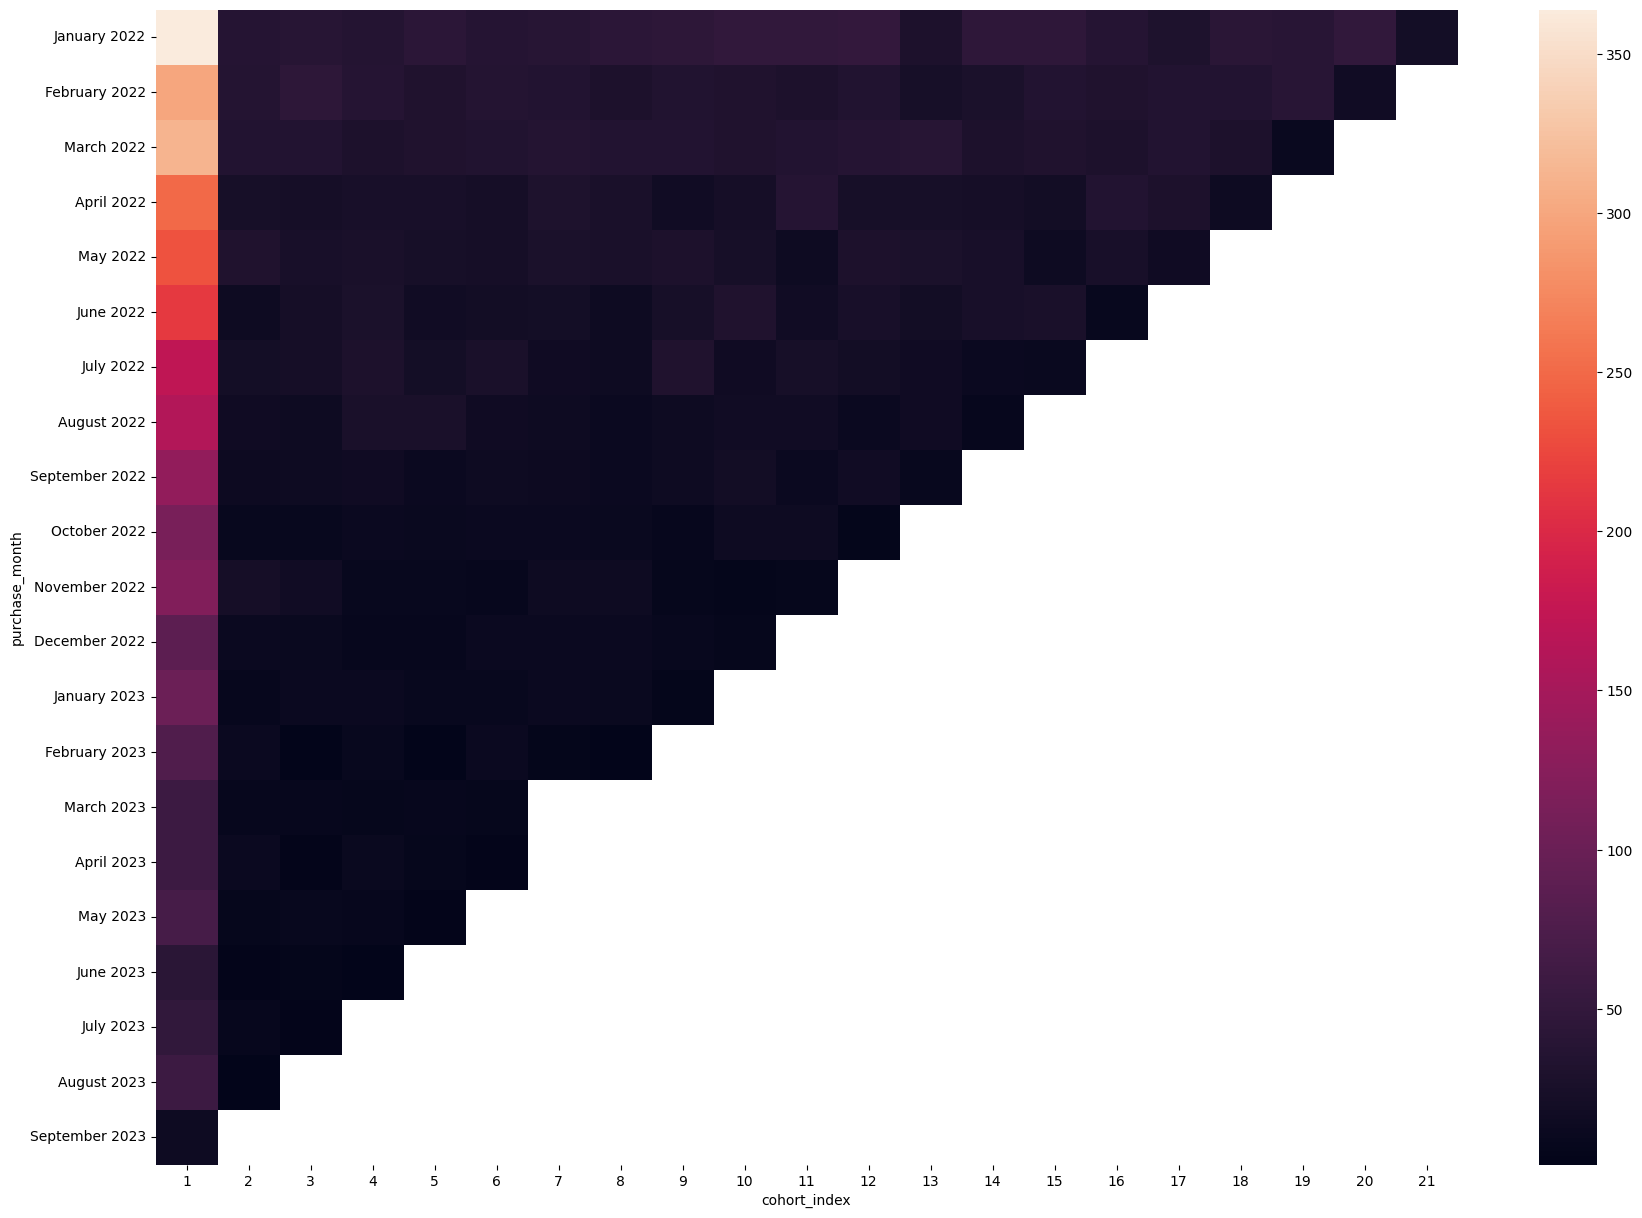

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21, 15))
sns.heatmap(cohort_table)

In [14]:
january = cohort_table.loc['January 2022']
axis1_cohort_ratio = cohort_table.div(january, axis=1)
axis1_cohort_ratio

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.0
February 2022,0.824176,0.972973,1.157895,1.027778,0.720930,0.972973,0.921053,0.651163,0.750000,0.666667,...,0.66,0.821429,0.586957,0.777778,0.864865,1.133333,0.853659,1.00,0.354167,NaN
March 2022,0.857143,0.918919,0.894737,0.777778,0.744186,0.891892,0.947368,0.790698,0.795455,0.666667,...,0.74,1.392857,0.608696,0.688889,0.756757,1.133333,0.707317,0.25,NaN,NaN
April 2022,0.686813,0.621622,0.578947,0.694444,0.581395,0.594595,0.789474,0.604651,0.409091,0.437500,...,0.46,0.821429,0.478261,0.422222,0.945946,0.966667,0.341463,NaN,NaN,NaN
May 2022,0.640110,0.864865,0.631579,0.722222,0.534884,0.594595,0.710526,0.604651,0.636364,0.479167,...,0.58,0.964286,0.543478,0.333333,0.648649,0.533333,NaN,NaN,NaN,NaN
June 2022,0.587912,0.405405,0.552632,0.750000,0.395349,0.513514,0.526316,0.348837,0.522727,0.666667,...,0.48,0.678571,0.521739,0.577778,0.243243,NaN,NaN,NaN,NaN,NaN
July 2022,0.472527,0.540541,0.578947,0.777778,0.465116,0.702703,0.421053,0.325581,0.704545,0.333333,...,0.38,0.571429,0.260870,0.222222,NaN,NaN,NaN,NaN,NaN,NaN
August 2022,0.439560,0.432432,0.394737,0.722222,0.604651,0.432432,0.394737,0.279070,0.340909,0.375000,...,0.22,0.571429,0.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2022,0.365385,0.351351,0.394737,0.444444,0.255814,0.378378,0.342105,0.279070,0.340909,0.395833,...,0.34,0.321429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

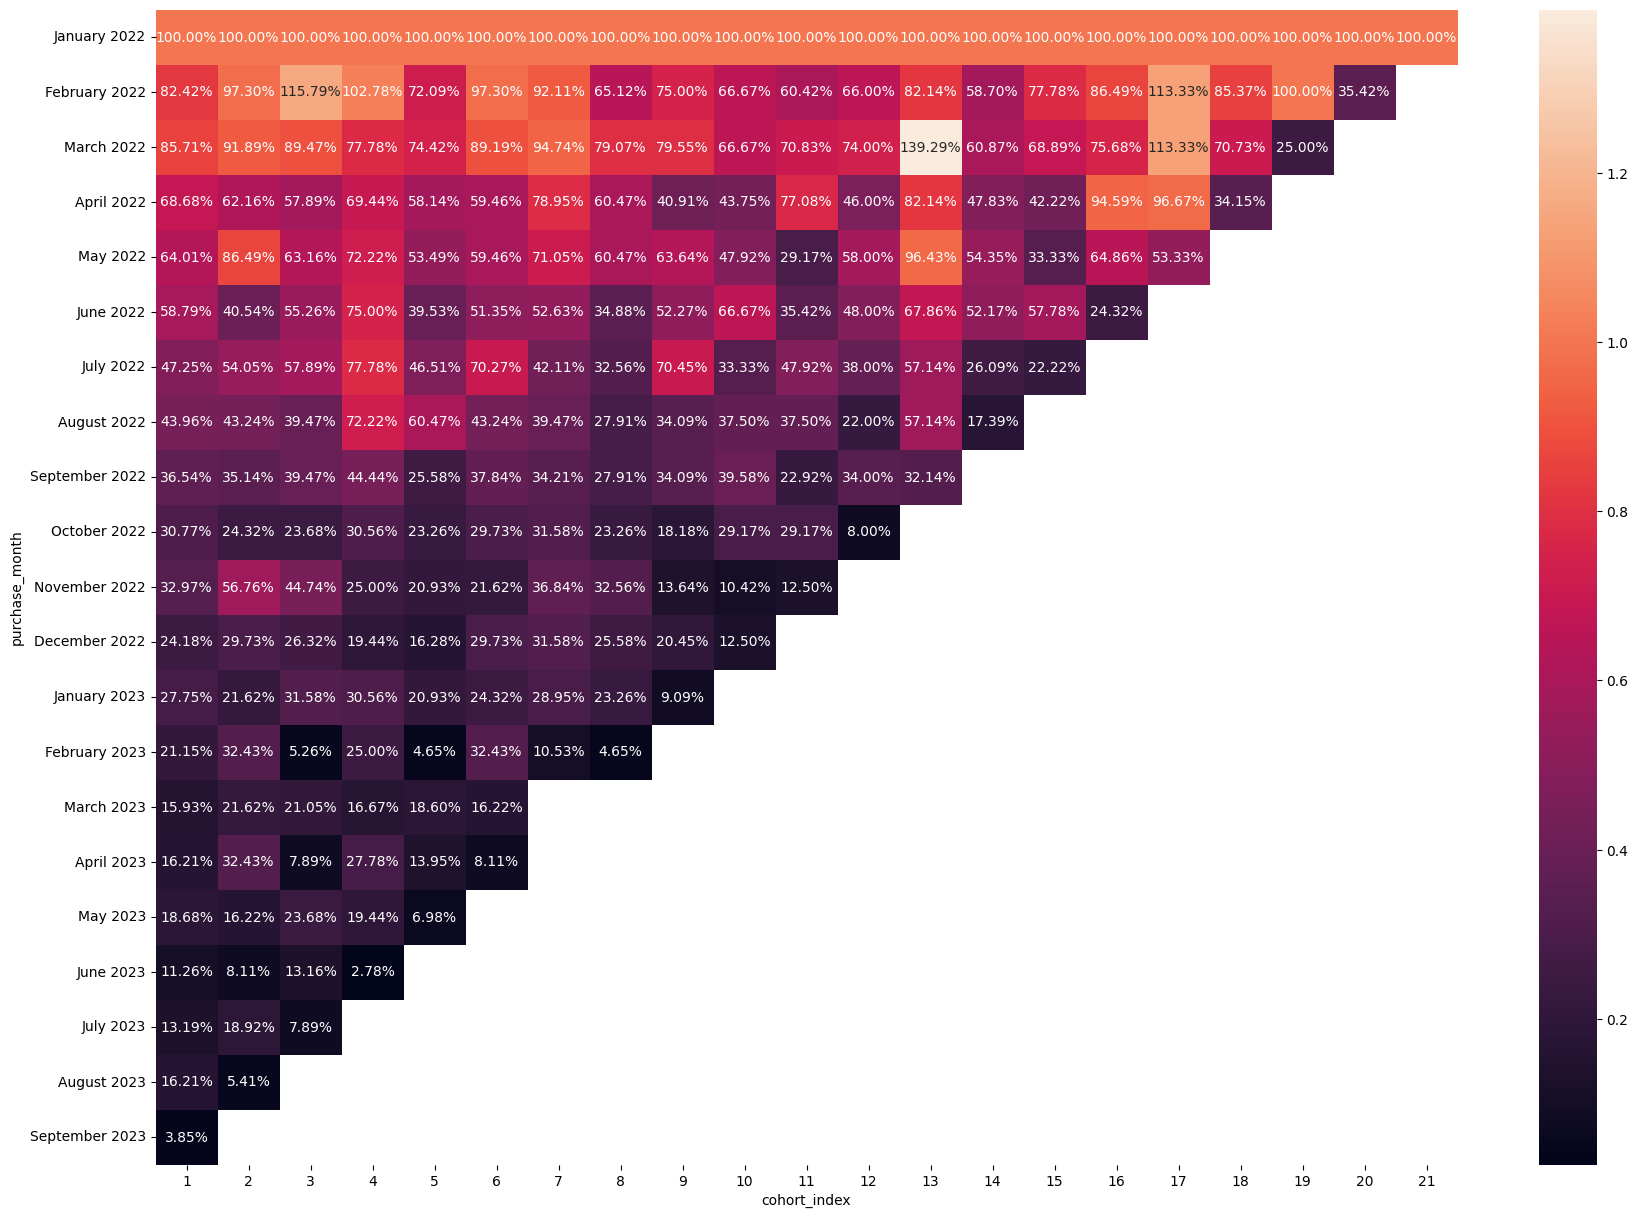

In [15]:
plt.figure(figsize=(21, 15))
sns.heatmap(axis1_cohort_ratio, annot=True, fmt='.02%')

In [16]:
first = cohort_table.iloc[:, 0]
axis0_cohort_table = cohort_table.div(first, axis=0)
axis0_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2022,1.0,0.101648,0.104396,0.098901,0.118132,0.101648,0.104396,0.118132,0.120879,0.131868,...,0.137363,0.076923,0.126374,0.123626,0.101648,0.082418,0.112637,0.109890,0.131868,0.054945
February 2022,1.0,0.120000,0.146667,0.123333,0.103333,0.120000,0.116667,0.093333,0.110000,0.106667,...,0.110000,0.076667,0.090000,0.116667,0.106667,0.113333,0.116667,0.133333,0.056667,NaN
March 2022,1.0,0.108974,0.108974,0.089744,0.102564,0.105769,0.115385,0.108974,0.112179,0.102564,...,0.118590,0.125000,0.089744,0.099359,0.089744,0.108974,0.092949,0.032051,NaN,NaN
April 2022,1.0,0.092000,0.088000,0.100000,0.100000,0.088000,0.120000,0.104000,0.072000,0.084000,...,0.092000,0.092000,0.088000,0.076000,0.140000,0.116000,0.056000,NaN,NaN,NaN
May 2022,1.0,0.137339,0.103004,0.111588,0.098712,0.094421,0.115880,0.111588,0.120172,0.098712,...,0.124464,0.115880,0.107296,0.064378,0.103004,0.068670,NaN,NaN,NaN,NaN
June 2022,1.0,0.070093,0.098131,0.126168,0.079439,0.088785,0.093458,0.070093,0.107477,0.149533,...,0.112150,0.088785,0.112150,0.121495,0.042056,NaN,NaN,NaN,NaN,NaN
July 2022,1.0,0.116279,0.127907,0.162791,0.116279,0.151163,0.093023,0.081395,0.180233,0.093023,...,0.110465,0.093023,0.069767,0.058140,NaN,NaN,NaN,NaN,NaN,NaN
August 2022,1.0,0.100000,0.093750,0.162500,0.162500,0.100000,0.093750,0.075000,0.093750,0.112500,...,0.068750,0.100000,0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2022,1.0,0.097744,0.112782,0.120301,0.082707,0.105263,0.097744,0.090226,0.112782,0.142857,...,0.127820,0.067669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

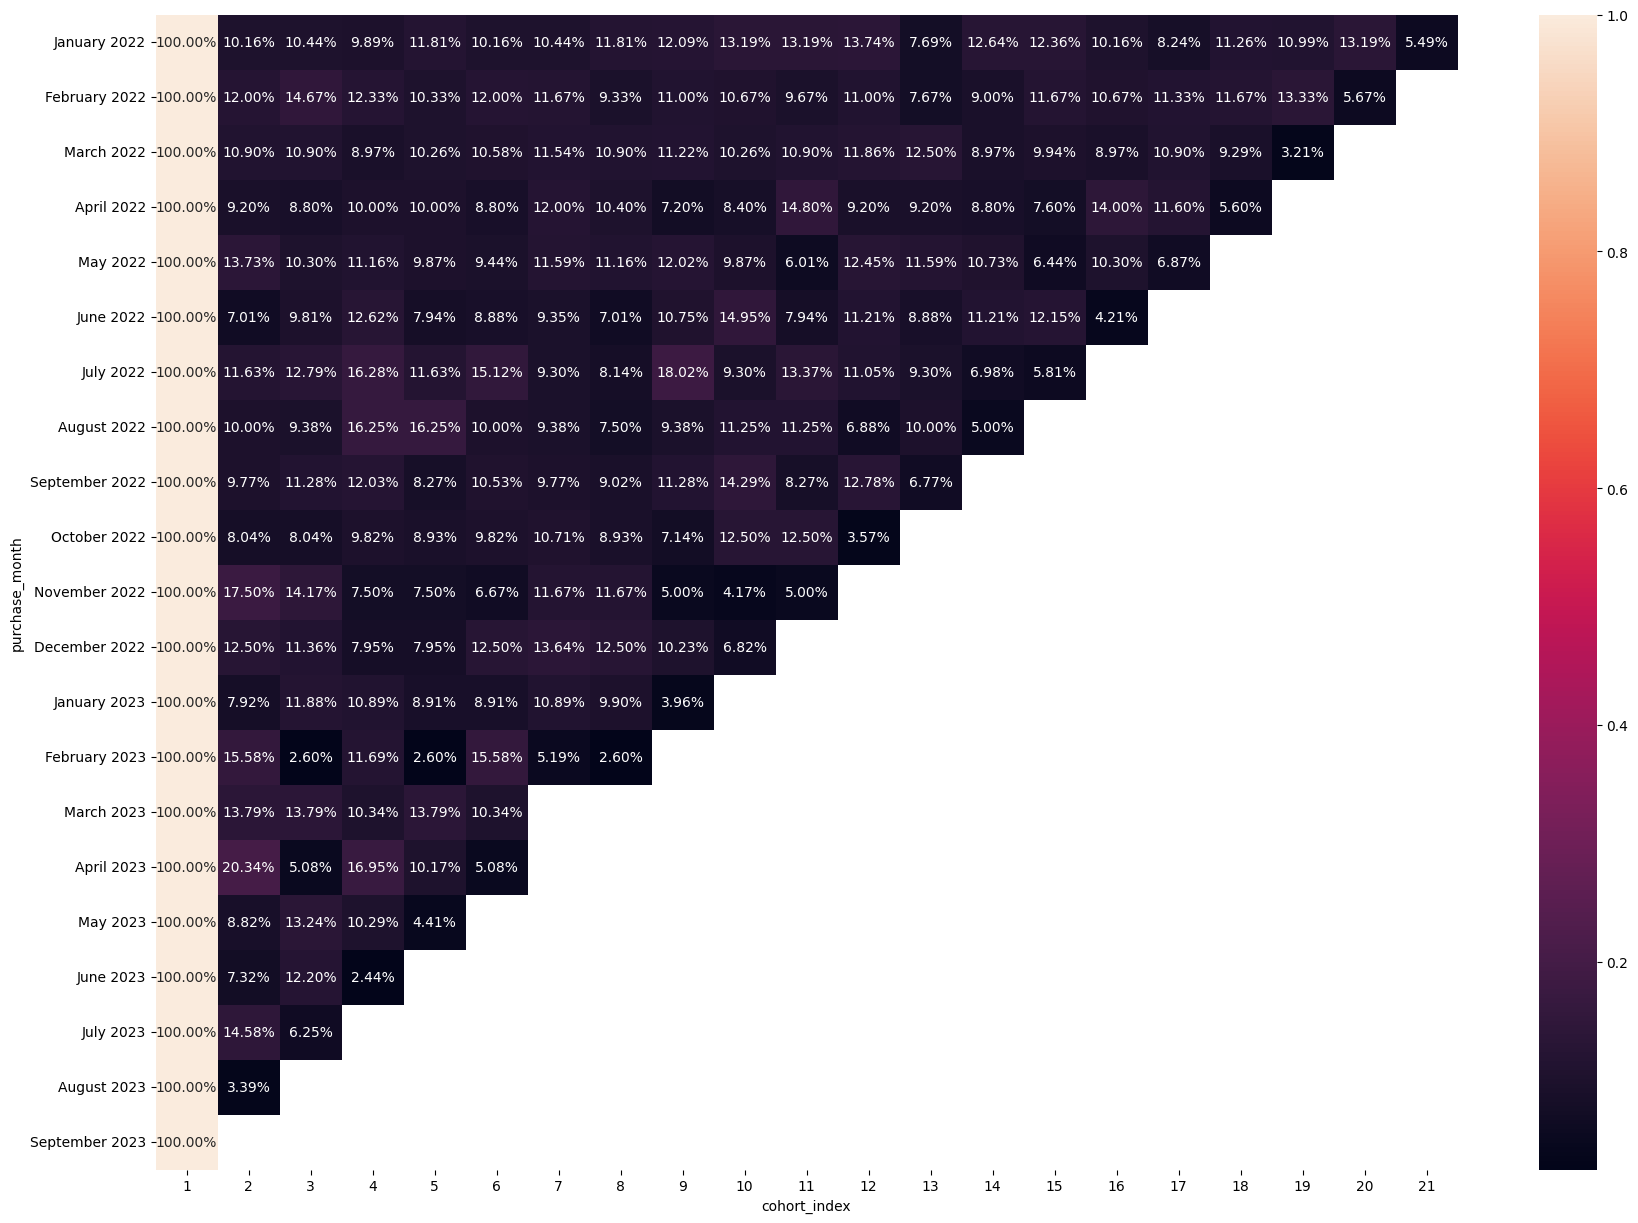

In [17]:
plt.figure(figsize=(21, 15))
sns.heatmap(axis0_cohort_table, annot=True, fmt='.02%')